📊 **EPL Visualisations Notebook**
- This notebook provides an exploratory data analysis (EDA) of English Premier League (EPL) match data. It focuses on key aspects of team and match performance using visual insights.

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [48]:
# Load your cleaned EPL dataset
df = pd.read_csv("../data/epl_cleaned.csv")

In [49]:
# Display the first 50 rows of the DataFrame
df.head(50)

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,AwayCorners,HomeFouls,AwayFouls,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Result,Goal_Diff,Total_Goals
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,6,13,12,1,2,0,0,Home Win,4,4
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,7,19,14,1,2,0,0,Home Win,2,6
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,4,15,21,5,3,1,0,Away Win,-2,4
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,8,11,13,1,1,0,0,Draw,0,4
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,4,21,20,1,3,0,0,Home Win,2,2
5,2000/01,2000-08-19,Leicester,Aston Villa,0,0,D,0,0,D,...,4,12,12,2,3,0,0,Draw,0,0
6,2000/01,2000-08-19,Liverpool,Bradford,1,0,H,0,0,D,...,1,8,8,1,1,0,0,Home Win,1,1
7,2000/01,2000-08-19,Sunderland,Arsenal,1,0,H,0,0,D,...,9,10,21,3,1,0,1,Home Win,1,1
8,2000/01,2000-08-19,Tottenham,Ipswich,3,1,H,2,1,H,...,4,14,13,0,0,0,0,Home Win,2,4
9,2000/01,2000-08-20,Man United,Newcastle,2,0,H,1,0,H,...,1,7,13,0,1,0,0,Home Win,2,2


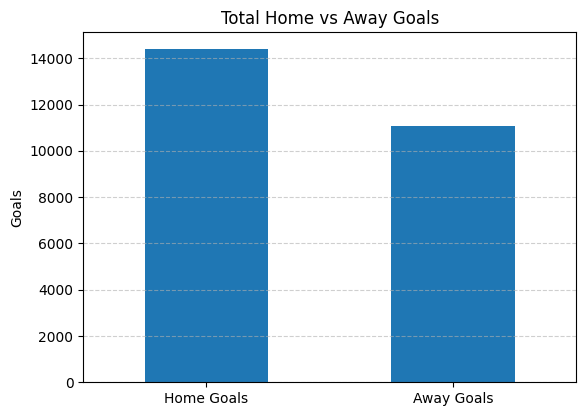

In [50]:
# 1. Total Home vs Away Goals
plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
df[['FullTimeHomeGoals', 'FullTimeAwayGoals']].sum().plot(kind='bar')
plt.title('Total Home vs Away Goals')
plt.ylabel('Goals')
plt.xticks(ticks=[0, 1], labels=['Home Goals', 'Away Goals'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)

This bar chart compares the total number of goals scored by home teams versus away teams. It helps assess whether playing at home provides a scoring advantage — a common trend in football due to crowd support and familiar conditions.

- Insight Goal:
Determine if there is a home-field advantage in goal scoring.

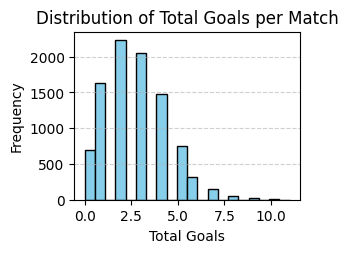

In [51]:
# 2. Histogram of Total Goals per Match
plt.subplot(2, 2, 2)
df['Total_Goals'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Goals per Match')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Cumulative Points over time
- Now that the total goals, home wins and away wins have been determined.
- Using the data in the columns to now create a cumulative points system

In [52]:
# 3. Cumulative Points Over Time (Aston Villa)
team = "Aston Villa"
team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].copy()
team_df['MatchDate'] = pd.to_datetime(team_df['MatchDate'])

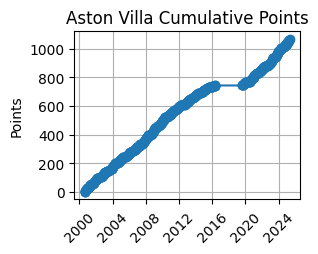

In [53]:
# 3. Cumulative Points Over Time (Aston Villa)
team = "Aston Villa"
team_df = df[(df['HomeTeam'] == team) | (df['AwayTeam'] == team)].copy()
team_df['MatchDate'] = pd.to_datetime(team_df['MatchDate'])

def get_points(row, team):
    if row['HomeTeam'] == team:
        if row['FullTimeResult'] == 'H': return 3
        if row['FullTimeResult'] == 'D': return 1
    elif row['AwayTeam'] == team:
        if row['FullTimeResult'] == 'A': return 3
        if row['FullTimeResult'] == 'D': return 1
    return 0

team_df['Points'] = team_df.apply(lambda row: get_points(row, team), axis=1)
team_df.sort_values('MatchDate', inplace=True)
team_df['CumulativePoints'] = team_df['Points'].cumsum()

plt.subplot(2, 2, 3)
plt.plot(team_df['MatchDate'], team_df['CumulativePoints'], marker='o')
plt.title(f'{team} Cumulative Points')
plt.ylabel('Points')
plt.xticks(rotation=45)
plt.grid(True)

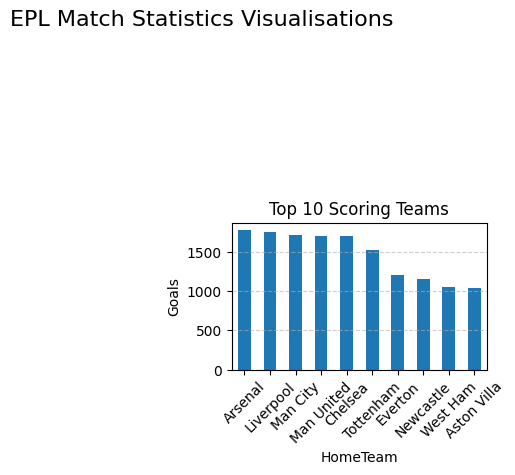

In [54]:
# 4. Top 10 Scoring Teams
home_goals = df.groupby('HomeTeam')['FullTimeHomeGoals'].sum()
away_goals = df.groupby('AwayTeam')['FullTimeAwayGoals'].sum()
total_goals = home_goals.add(away_goals, fill_value=0).sort_values(ascending=False).head(10)

plt.subplot(2, 2, 4)
total_goals.plot(kind='bar')
plt.title('Top 10 Scoring Teams')
plt.ylabel('Goals')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.suptitle("EPL Match Statistics Visualisations", fontsize=16)
plt.show()

In [55]:
# Ensure correct datetime format
df['MatchDate'] = pd.to_datetime(df['MatchDate'])

In [56]:
# Compute total goals if not present
if 'Total_Goals' not in df.columns:
    df['Total_Goals'] = df['FullTimeHomeGoals'] + df['FullTimeAwayGoals']

In [57]:
# Monthly average goals
df['Month'] = df['MatchDate'].dt.month
monthly_avg_goals = df.groupby('Month')['Total_Goals'].mean()

In [58]:
# Goal difference heatmap data
goal_diff = df.groupby('HomeTeam')['FullTimeHomeGoals'].sum().subtract(
    df.groupby('AwayTeam')['FullTimeAwayGoals'].sum(), fill_value=0)
goal_diff_df = pd.DataFrame(goal_diff, columns=['Goal_Difference'])

In [59]:
# Result distribution
result_counts = df['FullTimeResult'].value_counts()

In [60]:
# Points per match
def assign_points(row):
    if row['FullTimeResult'] == 'H':
        return {row['HomeTeam']: 3, row['AwayTeam']: 0}
    elif row['FullTimeResult'] == 'A':
        return {row['HomeTeam']: 0, row['AwayTeam']: 3}
    else:
        return {row['HomeTeam']: 1, row['AwayTeam']: 1}

points_dict = {}
for _, row in df.iterrows():
    pts = assign_points(row)
    for team, p in pts.items():
        points_dict[team] = points_dict.get(team, []) + [p]

points_per_match = {team: sum(pts)/len(pts) for team, pts in points_dict.items()}
points_series = pd.Series(points_per_match).sort_values(ascending=False)

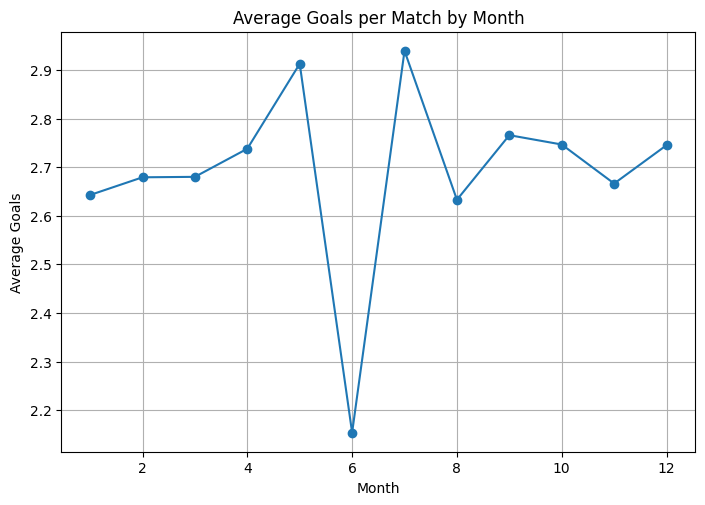

In [61]:
# Plot 1: Monthly Goals
plt.figure(figsize=(18, 12))
plt.subplot(2, 2, 1)
monthly_avg_goals.plot(kind='line', marker='o')
plt.title("Average Goals per Match by Month")
plt.xlabel("Month")
plt.ylabel("Average Goals")
plt.grid(True)

Text(0.5, 1.0, 'Goal Difference (Home - Away) by Team')

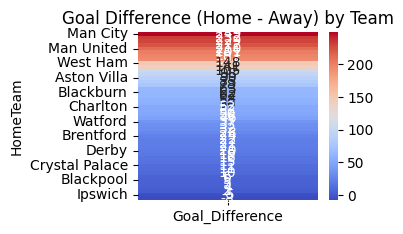

In [62]:
# Plot 2: Heatmap Goal Diff
plt.subplot(2, 2, 2)
sns.heatmap(goal_diff_df.sort_values('Goal_Difference', ascending=False), annot=True, fmt='.0f', cmap="coolwarm")
plt.title("Goal Difference (Home - Away) by Team")

Text(0.5, 1.0, 'Goal Difference (Home - Away) by Team')

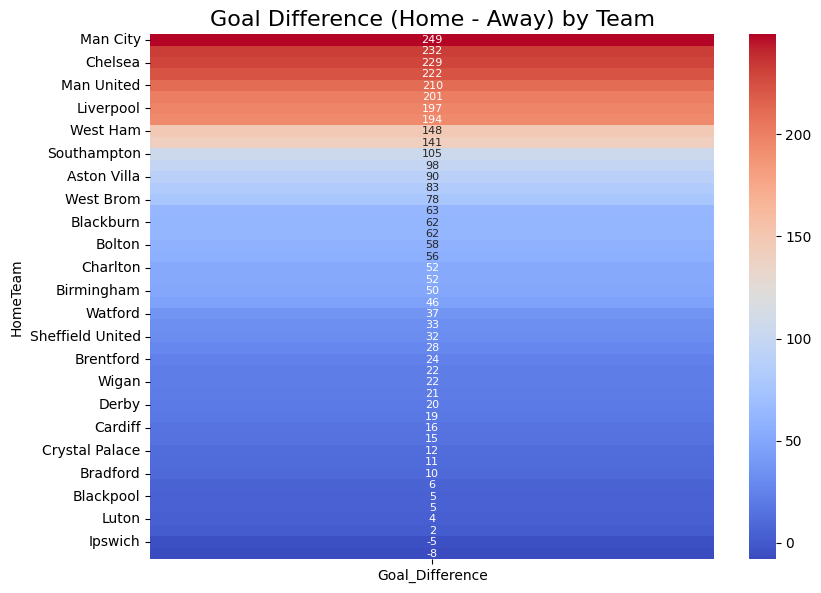

In [63]:
# Alternative: Adjust the subplot layout
plt.figure(figsize=(20, 15))  # Much larger figure
plt.subplot(2, 2, 2)
sns.heatmap(goal_diff_df.sort_values('Goal_Difference', ascending=False), 
            annot=True, 
            fmt='.0f', 
            cmap="coolwarm",
            annot_kws={'size': 8})
plt.title("Goal Difference (Home - Away) by Team", fontsize=16)

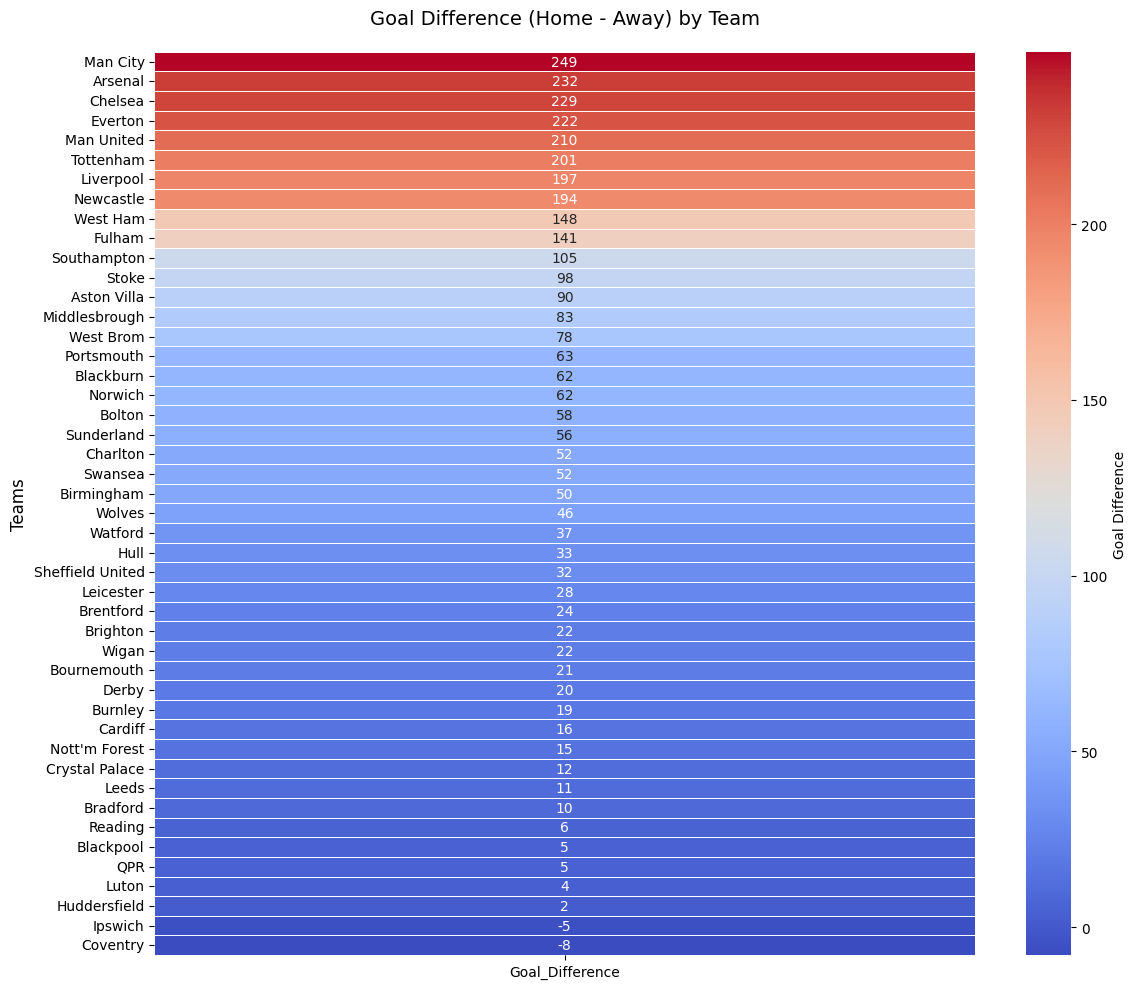

In [64]:
# Plot 2: Heatmap Goal Diff - Improved version
plt.figure(figsize=(12, 10))  # Create a new figure with larger size
sns.heatmap(goal_diff_df.sort_values('Goal_Difference', ascending=False), 
            annot=True, 
            fmt='.0f', 
            cmap="coolwarm",
            cbar_kws={'label': 'Goal Difference'},
            annot_kws={'size': 10},  # Increase annotation font size
            square=False,  # Allow rectangular cells
            linewidths=0.5)  # Add grid lines between cells
plt.title("Goal Difference (Home - Away) by Team", fontsize=14, pad=20)
plt.xlabel("", fontsize=12)
plt.ylabel("Teams", fontsize=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Text(0, 0.5, '')

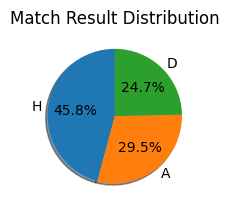

In [65]:
# Plot 3: Pie Chart of Results
plt.subplot(2, 2, 3)
result_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Match Result Distribution")
plt.ylabel('')

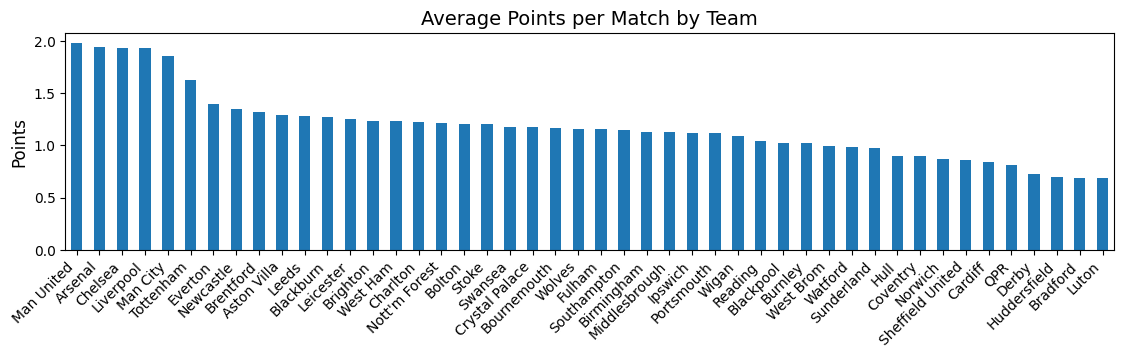

In [66]:
# Optional: set figure size for subplot layout
plt.figure(figsize=(22, 6))  # Wider and taller canvas

# Your existing code with modifications
plt.subplot(2, 2, 4)
points_series.plot(kind='bar')

plt.title("Average Points per Match by Team", fontsize=14)
plt.ylabel("Points", fontsize=12)

# Rotate labels and ensure they don't overlap
plt.xticks(rotation=45, ha='right', fontsize=10)

# Improve layout
plt.tight_layout()
plt.show()

In [67]:
# Synthetic xG generation (for demo)
np.random.seed(42)
if 'Home_xG' not in df.columns:
    df['Home_xG'] = df['FullTimeHomeGoals'] + np.random.normal(0, 0.5, size=len(df))
if 'Away_xG' not in df.columns:
    df['Away_xG'] = df['FullTimeAwayGoals'] + np.random.normal(0, 0.5, size=len(df))

C:\Users\ajayc\AppData\Local\Temp\ipykernel_26276\52901680.py:23: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.

c:\Projects\english-premier-league-capstone-project\english-premier-league-capstone-project\.venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.



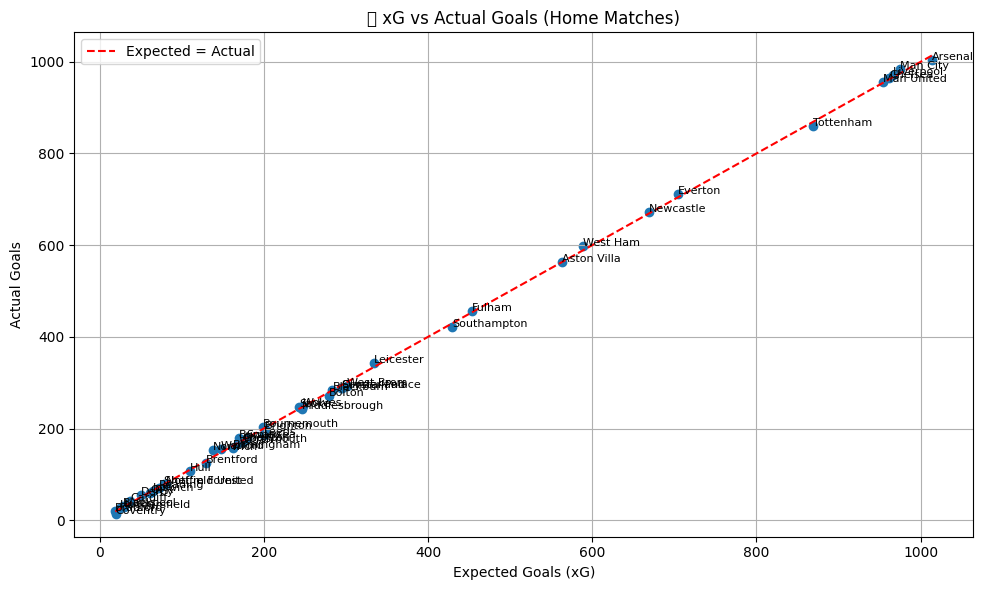

In [72]:
# Create synthetic xG values for demonstration
np.random.seed(42)
df['Home_xG'] = df['FullTimeHomeGoals'] + np.random.normal(0, 0.5, size=len(df))
df['Away_xG'] = df['FullTimeAwayGoals'] + np.random.normal(0, 0.5, size=len(df))

team_xg = df.groupby('HomeTeam')[['FullTimeHomeGoals', 'Home_xG']].sum().rename_axis("Team").reset_index()
team_xg.columns = ['Team', 'ActualGoals', 'ExpectedGoals']

plt.figure(figsize=(10, 6))
plt.scatter(team_xg['ExpectedGoals'], team_xg['ActualGoals'])

for i, row in team_xg.iterrows():
    plt.text(row['ExpectedGoals'], row['ActualGoals'], row['Team'], fontsize=8)

plt.plot([team_xg['ExpectedGoals'].min(), team_xg['ExpectedGoals'].max()],
         [team_xg['ExpectedGoals'].min(), team_xg['ExpectedGoals'].max()],
         'r--', label='Expected = Actual')
plt.xlabel("Expected Goals (xG)")
plt.ylabel("Actual Goals")
plt.title("🎯 xG vs Actual Goals (Home Matches)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


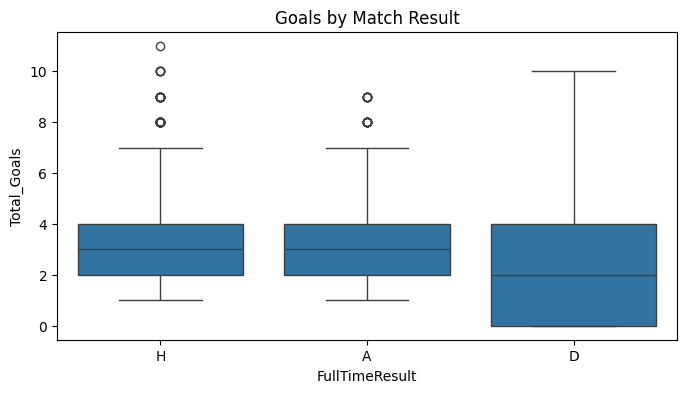

In [74]:
# Boxplot: Goals by Match Result
plt.figure(figsize=(8, 4))
sns.boxplot(x='FullTimeResult', y='Total_Goals', data=df)
plt.title('Goals by Match Result')
plt.show()

In [73]:
df.head(1000)

,Season,MatchDate,HomeTeam,AwayTeam,FullTimeHomeGoals,FullTimeAwayGoals,FullTimeResult,HalfTimeHomeGoals,HalfTimeAwayGoals,HalfTimeResult,...,HomeYellowCards,AwayYellowCards,HomeRedCards,AwayRedCards,Result,Goal_Diff,Total_Goals,Month,Home_xG,Away_xG
0,2000/01,2000-08-19,Charlton,Man City,4,0,H,2,0,H,...,1,2,0,0,Home Win,4,4,8,4.248357,-0.001119
1,2000/01,2000-08-19,Chelsea,West Ham,4,2,H,1,0,H,...,1,2,0,0,Home Win,2,6,8,3.930868,1.466283
2,2000/01,2000-08-19,Coventry,Middlesbrough,1,3,A,1,1,D,...,5,3,1,0,Away Win,-2,4,8,1.323844,2.370468
3,2000/01,2000-08-19,Derby,Southampton,2,2,D,1,2,A,...,1,1,0,0,Draw,0,4,8,2.761515,1.497342
4,2000/01,2000-08-19,Leeds,Everton,2,0,H,2,0,H,...,1,3,0,0,Home Win,2,2,8,1.882923,-0.361584
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,2002/03,2003-01-19,Arsenal,West Ham,3,1,H,1,1,D,...,3,1,0,1,Home Win,2,4,1,2.859450,1.287678
996,2002/03,2003-01-19,Fulham,Middlesbrough,1,0,H,1,0,H,...,0,1,0,0,Home Win,1,1,1,1.898843,0.480307
997,2002/03,2003-01-22,Charlton,West Ham,4,2,H,2,1,H,...,0,1,0,0,Home Win,2,6,1,4.320421,2.395749
998,2002/03,2003-01-22,Newcastle,Bolton,1,0,H,1,0,H,...,1,2,0,0,Home Win,1,1,1,0.714411,-0.085905
